<a href="https://colab.research.google.com/github/DeviprasadGunturu/NLP/blob/main/nlp_5_9_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Performance Evaluation:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.820749   0.846995  0.711009  0.773067
Random Forest        0.792515   0.792388  0.700306  0.743506
Decision Tree        0.741300   0.692878  0.714067  0.703313

--- Feature Importance Analysis ---

Top 20 Terms for Disaster Tweets:
         feature  coefficient
2016   hiroshima     3.438898
613   california     2.613375
1637       fires     2.404183
2362      killed     2.361781
4853    wildfire     2.298603
572    buildings     2.257068
1308  earthquake     2.242581
4253     suicide     2.206616
4198       storm     2.180792
4490       train     2.107608
1702      forest     2.091117
3329      police     2.028034
2948        near     2.022433
1671      floods     2.017885
2703    massacre     1.949414
502      bombing     1.925749
1079      debris     1.827660
2764          mh     1.757587
2285       japan     1.726413
1127  derailment     1.701143

Top 20 Terms for Non-Di

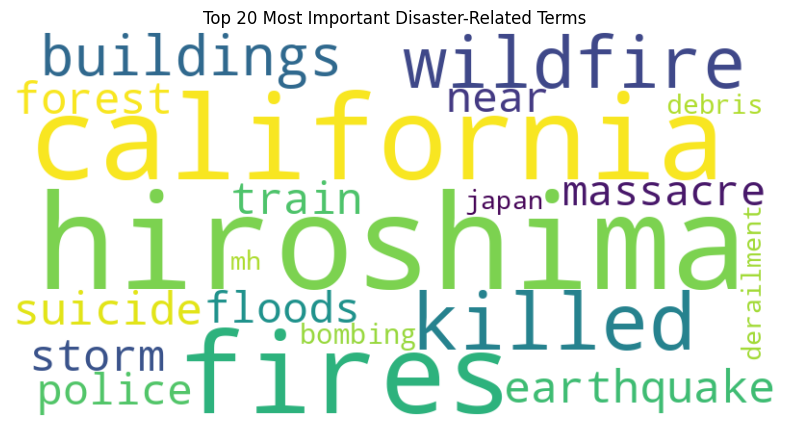

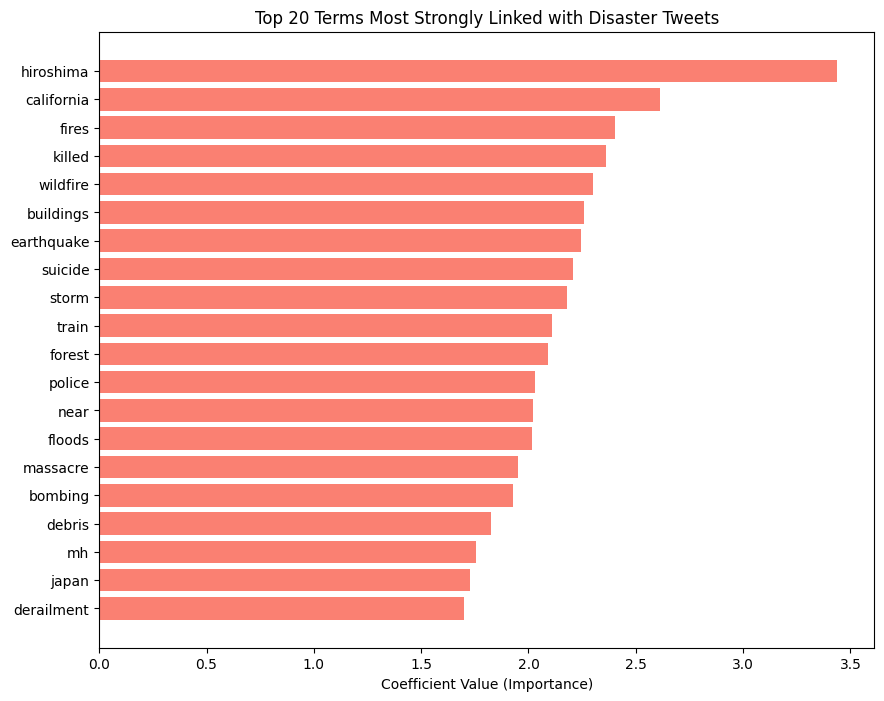

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

try:
    df = pd.read_csv('/content/train.csv')
except FileNotFoundError:
    print("Please download the 'train.csv' file from the Kaggle Disaster Tweets competition.")
    data = {
        'text': [
            'A fire in a building', 'I love this new song, it is fire', 'Earthquake reported in California', 'My love for you is like an earthquake',
            'Flooding in the city', 'This is the worst flood ever', 'Hurricane approaching the coast', 'I love hurricane season',
            'Wildfire spreading rapidly', 'That concert was a wildfire', 'Tornado warning issued', 'My emotions are a tornado right now',
            'Volcano erupting in Hawaii', 'The party was volcanic', 'Mass casualty event reported', 'This is a killer party',
            'Building collapsed', 'My energy collapsed after work', 'Bridge is down due to accident', "I'm down for anything tonight"
        ],
        'target': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
    }
    df = pd.DataFrame(data)
    print(f"Generated a dummy DataFrame with {len(df)} rows.")


def clean_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

X = df['cleaned_text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
print("Model Performance Evaluation:")
print(results_df)

log_reg_model = models["Logistic Regression"]
feature_names = vectorizer.get_feature_names_out()
coefficients = log_reg_model.coef_[0]

coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
coef_df = coef_df.sort_values('coefficient', ascending=False)

top_disaster_terms = coef_df.head(20)
top_nondisaster_terms = coef_df.tail(20).sort_values('coefficient', ascending=True)

print("\n--- Feature Importance Analysis ---")
print("\nTop 20 Terms for Disaster Tweets:")
print(top_disaster_terms)
print("\nTop 20 Terms for Non-Disaster Tweets:")
print(top_nondisaster_terms)

disaster_word_freq = {row['feature']: row['coefficient'] for index, row in top_disaster_terms.iterrows()}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(disaster_word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Most Important Disaster-Related Terms')
plt.show()

plt.figure(figsize=(10, 8))
plt.barh(top_disaster_terms['feature'], top_disaster_terms['coefficient'], color='salmon')
plt.xlabel('Coefficient Value (Importance)')
plt.title('Top 20 Terms Most Strongly Linked with Disaster Tweets')
plt.gca().invert_yaxis()
plt.show()
